In [5]:
!pip install matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
from utils import *
import copy

In [6]:
X_train, y_train = load_data("ex2data1.txt")

In [7]:
print(f"X : \n{X_train[:5]}")
print("type of  X_train : ",type(X_train))

X : 
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
type of  X_train :  <class 'numpy.ndarray'>


In [8]:
print("First elements in the Y : ", y_train[:5])

First elements in the Y :  [0. 0. 0. 1. 1.]


In [9]:
print("The shape of X_train is : " + str(X_train.shape))
print("The shape of y_train is : " + str(y_train.shape))

The shape of X_train is : (100, 2)
The shape of y_train is : (100,)


In [10]:
print("we have m = %d training examples " % (len(y_train)))
print(f'for eache training examples , there are {X_train.shape[1]} features ')

we have m = 100 training examples 
for eache training examples , there are 2 features 


In [11]:
def plot_data(X,y,pos_label="y=1",neg_label="y=1"):
    positive=y==1
    negative=y==0
    plt.plot(X[positive,0],X[positive,1],'k+',label=pos_label)
    plt.plot(X[negative,0],X[negative,1],'yo',label=neg_label)

Text(0.5, 0, 'Exam 1 score')

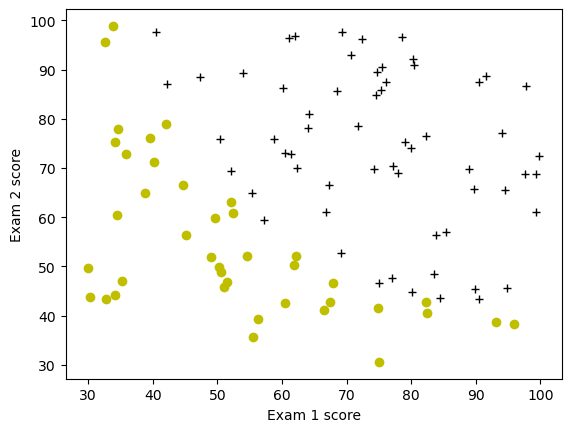

In [12]:
plot_data(X_train,y_train[:],pos_label="Admitted",neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')

In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
print("sigmoid(0) : " + str(sigmoid(0)))

sigmoid(0) : 0.5


In [15]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))


sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


## COST FUNCTION

In [16]:
#cost function 
def compute_cost(X,y,w,b,lambda_ = 1):
    m,n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb)- (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    return total_cost

In [17]:
m,n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0
cost = compute_cost(X_train,y_train,initial_w,initial_b)
print('Cost at initial w (zeros) : {:.3f}'.format(cost))

Cost at initial w (zeros) : 0.693


## Gradient cost function

In [18]:
def compute_gradient(X,y,w,b,lambda_= None):
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw , dj_db
    

## Gradient Descent Algorithm

In [19]:
#Learning parameters using gradient descent
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iter,lambda_):
    n = X.shape[1]
    w = w_in
    b = b_in
    
    J_history = []
    w_history = []
    
    for i in range(num_iter):
        dj_dw,dj_db = gradient_function(X,y,w,b,lambda_)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i < 10000 : 
            c = cost_function(X,y,w,b,lambda_)
            J_history.append(c)
        # Print the cost every at intervals 5
        if i % math.ceil(num_iter/5) == 0 or i == (num_iter - 1):
            w_history.append(w)
    return w,b,J_history,w_history   
    

In [20]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iter_ = 1000
learning_rate = 0.001

w,b,J_history,_ = gradient_descent(X_train,y_train,initial_w,initial_b,
                                   compute_cost,compute_gradient,learning_rate,iter_,0)

## Model Prediction : with threshold 0.5

In [21]:
def predict(X,w,b):
    m,n = X.shape
    p = np.zeros(m)
    for i in range(m):
        p_wb = np.dot(X[i],w) + b
        f_wb = sigmoid(p_wb)
        p[i] = 1 if f_wb > 0.5 else 0
    return p
    

In [22]:
p = predict(X_train,w,b)
print('Train accuracy : %f'%(np.mean(p == y_train)*100))

Train accuracy : 92.000000


## REGULARIZED LOGISTIC REGRESSION 

In [25]:
X_train , y_train = load_data("ex2data2.txt")

print("X_train ",X_train[:5])


X_train  [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


In [26]:
print('the shape of X_train : '+ str(X_train.shape))
print('the shape of Y : ' + str(y_train.shape[0]))

the shape of X_train : (118, 2)
the shape of Y : 118


Text(0.5, 0, 'Mircochip Test 1')

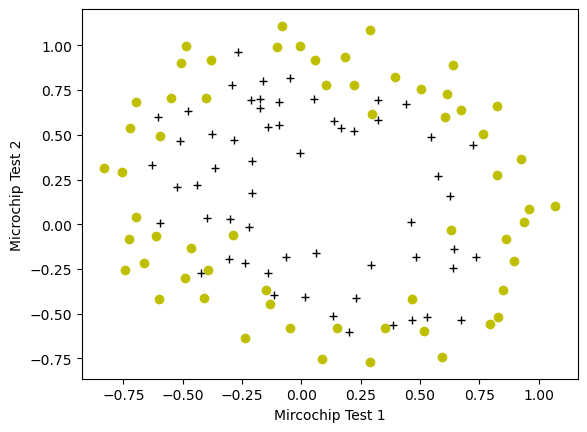

In [27]:
plot_data(X_train,y_train,pos_label="Accepted",neg_label="Rejected")
plt.ylabel('Microchip Test 2')
plt.xlabel('Mircochip Test 1') 